In [78]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy import stats

import requests
import json
from pprint import pprint
from config import api_key 
from player_key import player_key

In [79]:
nfl_stats = "nfl resources/NFL_Stats.csv"
nfl_stats_df = pd.read_csv(nfl_stats)
nfl_stats_df.head()

,Rk,Player,From,To,Draft,Tm,Lg,Ht,Wt,BMI,...,Rate,Y/A,Y/G,W,L,T,Yrs,PB,AP1,AV
0,1,Peyton Manning,1998,2015,1.0,TOT,NFL,77,230,27.3,...,96.5,7.67,270.5,186.0,79.0,0.0,17,14,7,271
1,2,Tom Brady,2000,2018,6.0,NWE,NFL,76,225,27.4,...,97.6,7.51,261.5,196.0,55.0,0.0,19,13,3,255
2,3,Drew Brees,2001,2018,2.0,TOT,NFL,72,209,28.3,...,96.7,7.58,282.9,142.0,106.0,0.0,18,11,1,239
3,4,Brett Favre*,1991,2010,2.0,TOT,NFL,74,225,28.9,...,86.0,7.06,237.9,186.0,112.0,0.0,20,11,3,255
4,5,John Elway*,1983,1998,1.0,DEN,NFL,75,215,26.9,...,79.9,7.10,220.0,148.0,82.0,1.0,16,9,0,203


In [80]:
# Clean Dataframe by renaming and deleting unnecssary columns

nfl_stats_df = nfl_stats_df.rename(columns={"Tm":"Team",
                                           "PB":"Pro Bowls",
                                           "Ht": "Height (in)"})
del nfl_stats_df["Wt"]
del nfl_stats_df["BMI"]
del nfl_stats_df["AV"]
del nfl_stats_df["AP1"]
del nfl_stats_df["Rk"]
del nfl_stats_df["Lg"]
del nfl_stats_df["Team"]


nfl_stats_df.head()


,Player,From,To,Draft,Height (in),G,GS,Cmp,Att,Cmp%,...,TD,Int,Rate,Y/A,Y/G,W,L,T,Yrs,Pro Bowls
0,Peyton Manning,1998,2015,1.0,77,266,265,6125,9380,65.30,...,539,251,96.5,7.67,270.5,186.0,79.0,0.0,17,14
1,Tom Brady,2000,2018,6.0,76,253,251,5629,8805,63.93,...,488,160,97.6,7.51,261.5,196.0,55.0,0.0,19,13
2,Drew Brees,2001,2018,2.0,72,249,248,6222,9294,66.95,...,488,228,96.7,7.58,282.9,142.0,106.0,0.0,18,11
3,Brett Favre*,1991,2010,2.0,74,302,298,6300,10169,61.95,...,508,336,86.0,7.06,237.9,186.0,112.0,0.0,20,11
4,John Elway*,1983,1998,1.0,75,234,231,4123,7250,56.87,...,300,226,79.9,7.10,220.0,148.0,82.0,1.0,16,9


In [81]:
nfl_stats_df.columns

Index(['Player', 'From', 'To', 'Draft', 'Height (in)', 'G', 'GS', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'Int', 'Rate', 'Y/A', 'Y/G', 'W', 'L', 'T', 'Yrs',
       'Pro Bowls'],
      dtype='object')

In [82]:
#Get Winning Percentage
nfl_stats_df ["W"].fillna(0, inplace=True)
nfl_stats_df ["L"].fillna(0, inplace=True)
nfl_stats_df ["T"].fillna(0, inplace=True)

nfl_stats_df["Win Record"] = (nfl_stats_df["W"]/(nfl_stats_df["W"] + nfl_stats_df["L"] + nfl_stats_df["T"]))

nfl_stats_df.head()

,Player,From,To,Draft,Height (in),G,GS,Cmp,Att,Cmp%,...,Int,Rate,Y/A,Y/G,W,L,T,Yrs,Pro Bowls,Win Record
0,Peyton Manning,1998,2015,1.0,77,266,265,6125,9380,65.30,...,251,96.5,7.67,270.5,186.0,79.0,0.0,17,14,0.701887
1,Tom Brady,2000,2018,6.0,76,253,251,5629,8805,63.93,...,160,97.6,7.51,261.5,196.0,55.0,0.0,19,13,0.780876
2,Drew Brees,2001,2018,2.0,72,249,248,6222,9294,66.95,...,228,96.7,7.58,282.9,142.0,106.0,0.0,18,11,0.572581
3,Brett Favre*,1991,2010,2.0,74,302,298,6300,10169,61.95,...,336,86.0,7.06,237.9,186.0,112.0,0.0,20,11,0.624161
4,John Elway*,1983,1998,1.0,75,234,231,4123,7250,56.87,...,226,79.9,7.10,220.0,148.0,82.0,1.0,16,9,0.640693


In [83]:
# Fill undrafted with a 0
nfl_stats_df["Draft"].fillna(0, inplace=True)
nfl_stats_df["Win Record"].fillna(0, inplace=True)
nfl_stats_df["Draft"] = nfl_stats_df["Draft"].astype(str)

In [84]:
#Dataframe of each Draft Round

undrafted = nfl_stats_df.loc[nfl_stats_df["Draft"] == "0.0"]
one = nfl_stats_df.loc[nfl_stats_df["Draft"] == "1.0"]
two = nfl_stats_df.loc[nfl_stats_df["Draft"] == "2.0"]
three = nfl_stats_df.loc[nfl_stats_df["Draft"] == "3.0"]
four = nfl_stats_df.loc[nfl_stats_df["Draft"] == "4.0"]
five = nfl_stats_df.loc[nfl_stats_df["Draft"] == "5.0"]
six = nfl_stats_df.loc[nfl_stats_df["Draft"] == "6.0"]
seven = nfl_stats_df.loc[nfl_stats_df["Draft"] == "7.0"]
eight = nfl_stats_df.loc[nfl_stats_df["Draft"] == "8.0"]
nine = nfl_stats_df.loc[nfl_stats_df["Draft"] == "9.0"]
ten = nfl_stats_df.loc[nfl_stats_df["Draft"] == "10.0"]
eleven = nfl_stats_df.loc[nfl_stats_df["Draft"] == "11.0"]
twelve = nfl_stats_df.loc[nfl_stats_df["Draft"] == "12.0"]
thirtheen = nfl_stats_df.loc[nfl_stats_df["Draft"] == "13.0"]
fourtheen = nfl_stats_df.loc[nfl_stats_df["Draft"] == "14.0"]

#Build Dataframe organized by Round and Average Passer Rating

ratings_by_draft = pd.DataFrame({"Undrafted":[undrafted["Rate"].mean()],
                                 "1st Round" : [one["Rate"].mean()],
                                 "2nd Round" : [two["Rate"].mean()],
                                 "3rd Round" : [three["Rate"].mean()],
                                 "4th Round" : [four["Rate"].mean()],
                                 "5th Round" : [five["Rate"].mean()],
                                 "6th Round" : [six["Rate"].mean()],
                                 "7th Round" : [seven["Rate"].mean()],
                                 "8th Round" : [eight["Rate"].mean()],
                                 "9th Round" : [nine["Rate"].mean()],
                                 "10th Round" : [ten["Rate"].mean()],
                                 "11th Round" : [eleven["Rate"].mean()],
                                 "12th Round" : [twelve["Rate"].mean()],
                                 "13th Round" : [thirtheen["Rate"].mean()],
                                 "14th Round" : [fourtheen["Rate"].mean()]})

ratings_by_draft = ratings_by_draft.T
ratings_by_draft.reset_index(level=0, inplace = True)
ratings_by_draft = ratings_by_draft.rename(columns={"index": "Draft Round",
                                                   "0": "Passer Rating"})

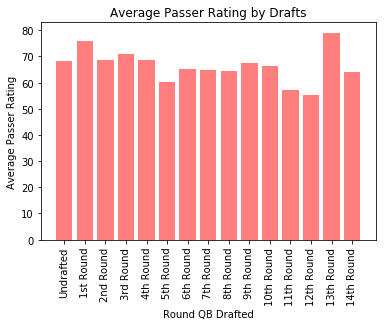

<Figure size 432x288 with 0 Axes>

In [85]:
# set x axis and tick location
x_axis = np.arange(len(ratings_by_draft))
tick_locations = [value for value in x_axis]

# Createa bar chart comparing draft position and passer rating
plt.bar(x_axis, ratings_by_draft[0], color = 'r', alpha = 0.5, align = "center")
plt.xticks(tick_locations, ratings_by_draft["Draft Round"], rotation = "vertical")

plt.title("Average Passer Rating by Drafts")
plt.xlabel("Round QB Drafted")
plt.ylabel("Average Passer Rating")
plt.show()
plt.savefig("Images/Average Passer Rating by Draft Rounds")

In [86]:
nfl_stats_df["Draft"] = nfl_stats_df["Draft"].astype(float)
heights = nfl_stats_df["Height (in)"].unique()
heights

array([77, 76, 72, 74, 75, 73, 71, 78, 70, 79, 80, 69], dtype=int64)

In [87]:
# Quarter by Height Bins 
height_bins = [0, 73, 75, 77, 82]
group_names = ["under 73 Inches", "73-75 Inches", "75-77 Inches", "over 77 Inches"]

nfl_stats_df["Height Range"] = pd.cut(nfl_stats_df["Height (in)"], height_bins, labels = group_names)

total_players = nfl_stats_df.groupby("Height Range")["Player"].count()
average_win_loss_record = nfl_stats_df.groupby("Height Range")["Win Record"].mean()
average_pro_bowl_appearance = nfl_stats_df.groupby("Height Range")["Pro Bowls"].mean()
total_pro_bowl_appearance = nfl_stats_df.groupby("Height Range")["Pro Bowls"].sum()
average_rating = nfl_stats_df.groupby("Height Range")["Rate"].mean()
average_record = nfl_stats_df.groupby("Height Range")["Win Record"].mean()
average_draft_spot = nfl_stats_df.groupby("Height Range")["Draft"].mean()

qb_by_height = pd.DataFrame({"Total Players": total_players,
                            "Avg Game Record": average_win_loss_record,
                             "Total Pro Bowls": total_pro_bowl_appearance,
                            "Avg Pro Bowl Appearances":average_pro_bowl_appearance,
                            "Average Passer Rating": average_rating,
                            "Average W/L Record": average_record, 
                            "Average Draft Spot":average_draft_spot})

qb_by_height["Average W/L Record"] = qb_by_height["Average W/L Record"].astype(float)
qb_by_height["Average W/L Record"] = qb_by_height["Average W/L Record"]*100
qb_by_height["Average W/L Record"] = qb_by_height["Average W/L Record"].map("{:.2f}%".format)


qb_by_height= qb_by_height.reset_index()
qb_by_height

,Height Range,Total Players,Avg Game Record,Total Pro Bowls,Avg Pro Bowl Appearances,Average Passer Rating,Average W/L Record,Average Draft Spot
0,under 73 Inches,97,0.265435,36,0.371134,67.442268,26.54%,3.092784
1,73-75 Inches,251,0.299855,109,0.434263,67.483267,29.99%,3.235060
2,75-77 Inches,153,0.328637,120,0.784314,71.818954,32.86%,2.862745
3,over 77 Inches,23,0.303712,4,0.173913,66.056522,30.37%,3.304348


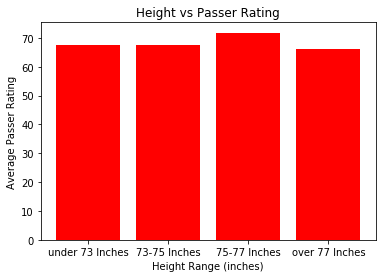

In [88]:
#Bar Graph comparing Height Groups vs Passer Ratings
x_axis = qb_by_height ["Height Range"]
plt.bar(x_axis, qb_by_height["Average Passer Rating"], color = "red", align = "center")
plt.xlabel ("Height Range (inches)")
plt.ylabel ("Average Passer Rating")
plt.title ("Height vs Passer Rating")


plt.savefig("Images/Height Bins vs Passer Rating")
plt.show()

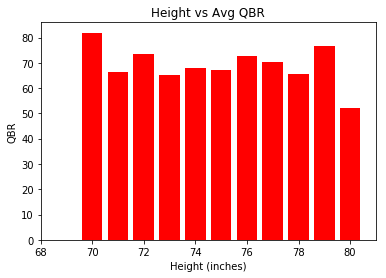

In [89]:
#Bar Chart comparing Height vs QBR Bar
heights_value = nfl_stats_df["Height (in)"].unique()
all_heights = sorted(heights_value)
all_heights

height_df = pd.DataFrame(nfl_stats_df.groupby("Height (in)")["Rate"].mean())
height_df.reset_index(level=0, inplace = True)
height_df.head()

x_axis = height_df["Height (in)"]

plt.bar(x_axis, height_df["Rate"], color = "red", align = "center")
plt.xlabel ("Height (inches)")
plt.ylabel ("QBR")
plt.title ("Height vs Avg QBR")


plt.savefig("Images/Height vs Passer Rating Bar Graph")
plt.show()

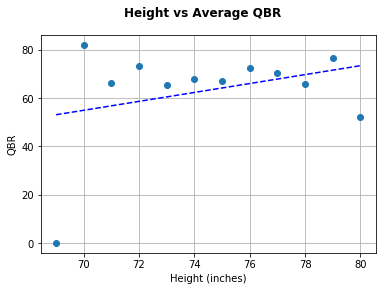

In [90]:
# Height vs Passer Rating LinReg Plot

(slope, intercept, _, _, _) = linregress(x_axis, height_df["Rate"])
fit = slope *x_axis + intercept
fig, ax = plt.subplots()

ax.plot(x_axis, height_df["Rate"], linewidth=0, marker = "o")
ax.plot(x_axis, fit, "b--")

fig.suptitle("Height vs Average QBR", fontsize=12, fontweight="bold")
ax.set_xlabel("Height (inches)")
ax.set_ylabel("QBR")

plt.grid()
plt.savefig("Images/Height vs Passer Rating LinReg")
plt.show()

In [91]:
#Check outliers
nfl_stats_df.loc[nfl_stats_df["Height (in)"]==70]

,Player,From,To,Draft,Height (in),G,GS,Cmp,Att,Cmp%,...,Rate,Y/A,Y/G,W,L,T,Yrs,Pro Bowls,Win Record,Height Range
61,Doug Flutie,1986,2005,11.0,70,92,66,1177,2151,54.72,...,76.3,6.84,159.9,38.0,28.0,0.0,12,1,0.575758,under 73 Inches
223,Marques Hagans,2007,2008,5.0,70,10,1,1,1,100.00,...,87.5,5.00,0.5,0.0,0.0,0.0,2,0,0.000000,under 73 Inches


In [92]:
#Check Outliers
nfl_stats_df.loc[nfl_stats_df["Height (in)"]==80]

,Player,From,To,Draft,Height (in),G,GS,Cmp,Att,Cmp%,...,Rate,Y/A,Y/G,W,L,T,Yrs,Pro Bowls,Win Record,Height Range
345,Dan McGwire,1991,1995,1.0,80,13,5,74,148,50.0,...,52.3,5.03,57.3,2.0,3.0,0.0,5,0,0.4,over 77 Inches


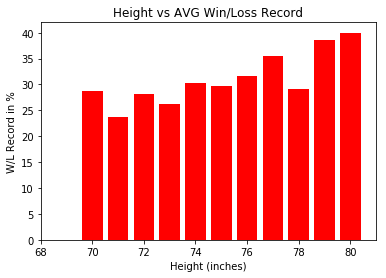

In [93]:
# Bar Graph Height vs Win Record
Win_Record = nfl_stats_df.groupby("Height (in)")["Win Record"].mean()
Win_Record = pd.DataFrame(Win_Record *100)
Win_Record.reset_index(level=0, inplace = True)

height_df ["Average Record"] = Win_Record ["Win Record"]

x_axis = height_df["Height (in)"]

plt.bar(x_axis, height_df["Average Record"], color = "red", align = "center")
plt.xlabel ("Height (inches)")
plt.ylabel ("W/L Record in %")
plt.title ("Height vs AVG Win/Loss Record")

plt.savefig("Images/Height vs Record Bar Graph")
plt.show()


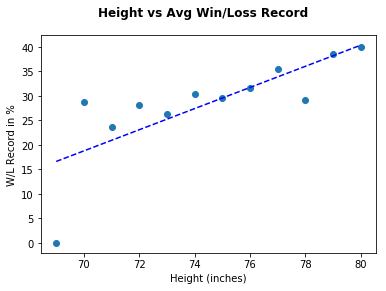

In [94]:
# Line Regression Plot of Height vs Win Record

Win_Record = nfl_stats_df.groupby("Height (in)")["Win Record"].mean()
Win_Record = pd.DataFrame(Win_Record *100)
Win_Record.reset_index(level=0, inplace = True)

height_df ["Average Record"] = Win_Record ["Win Record"]

x_axis = height_df["Height (in)"]

(slope, intercept, _, _, _) = linregress(x_axis, height_df["Average Record"])
fit = slope *x_axis + intercept
fig, ax = plt.subplots()

ax.plot(x_axis, height_df["Average Record"], linewidth=0, marker = "o")
ax.plot(x_axis, fit, "b--")

fig.suptitle("Height vs Avg Win/Loss Record", fontsize=12, fontweight="bold")
ax.set_xlabel("Height (inches)")
ax.set_ylabel("W/L Record in %")

plt.savefig("Images/Height vs Record LinReg")
plt.show()

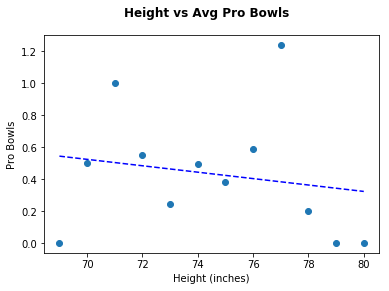

In [95]:
# Height vs Pro Bowl Apperaances LinReg

pro_bowls = nfl_stats_df.groupby("Height (in)")["Pro Bowls"].mean()
pro_bowls = pd.DataFrame(pro_bowls)
pro_bowls.reset_index(level=0, inplace = True)

height_df ["Pro Bowls"] = pro_bowls ["Pro Bowls"]

x_axis = height_df["Height (in)"]

(slope, intercept, _, _, _) = linregress(x_axis, height_df["Pro Bowls"])
fit = slope *x_axis + intercept
fig, ax = plt.subplots()

ax.plot(x_axis, height_df["Pro Bowls"], linewidth=0, marker = "o")
ax.plot(x_axis, fit, "b--")

fig.suptitle("Height vs Avg Pro Bowls", fontsize=12, fontweight="bold")
ax.set_xlabel("Height (inches)")
ax.set_ylabel("Pro Bowls")

plt.savefig("Images/Height vs Average Pro Bowl Appearances LinReg")
plt.show()

In [96]:
height_df = height_df.rename(columns={"Rate":"Average QB Rating",
                                     "Average Pro Bowl Appearances": "Avg Pro Bowl"})
height_df

,Height (in),Average QB Rating,Average Record,Pro Bowls
0,69,0.000000,0.000000,0.000000
1,70,81.900000,28.787879,0.500000
2,71,66.300000,23.745265,1.000000
3,72,73.306897,28.243414,0.551724
4,73,65.360656,26.280414,0.245902
5,74,68.005042,30.339593,0.495798
6,75,67.012879,29.666219,0.378788
7,76,72.500935,31.703772,0.588785
8,77,70.232609,35.561724,1.239130
9,78,65.690000,29.076861,0.200000


In [97]:
Mayfield = ["Baker Mayfield"]
mayfield_df = pd.DataFrame(Mayfield)
mayfield_df.columns = ["name"]
mayfield_df ['Draft'] = ''
mayfield_df ['height (inches)'] = ''
mayfield_df ['att'] = ''
mayfield_df ['comp'] = ''
mayfield_df ['yards'] = ''
mayfield_df ['TD'] = ''
mayfield_df ['INT'] = ''
mayfield_df ['yards'] = ''
mayfield_df ['QBR'] = ''
mayfield_df ['Wins'] = ''
mayfield_df ['Loss'] = ''
mayfield_df ['W/L Record'] = ''
mayfield_df

,name,Draft,height (inches),att,comp,yards,TD,INT,QBR,Wins,Loss,W/L Record
0,Baker Mayfield,,,,,,,,,,,


In [98]:
url = "http://api.sportradar.us/ncaafb-t1/teams/OKL/2017/REG/statistics.json?api_key="
key_url = url + api_key

response = requests.get(key_url)
print(response.url)
data = response.json()

data["players"][86]
data["players"][86]["statistics"]["passing"]

http://api.sportradar.us/ncaafb-t1/teams/OKL/2017/REG/statistics.json?api_key=74b3gmb4dspnhbcv4fv28n34


{'att': 404,
 'cmp': 285,
 'yds': 4627,
 'lg': 84,
 'sk': 26,
 'sk_yds': 174.0,
 'td': 43,
 'int': 6,
 'int_td': 0,
 'fd': 185,
 'sfty': 0,
 'rz_att': 61,
 'rating': 198.9,
 'avg': 11.453,
 'cmp_pct': 70.545,
 'cmp_avg': 16.235,
 'td_pct': 10.644,
 'int_pct': 1.485,
 'yds_10_pls': 86,
 'yds_20_pls': 35,
 'yds_30_pls': 14,
 'yds_40_pls': 10,
 'yds_50_pls': 13}

In [100]:
base_url = "http://api.sportradar.us/ncaafb-t1/teams/FBS/2017/REG/standings.json?api_key="
standing_url = base_url + api_key
standing = requests.get(standing_url)
standing_data = standing.json()

standing_data["division"]["conferences"][2]["teams"]

[{'id': 'OKL',
  'name': 'Sooners',
  'market': 'Oklahoma',
  'overall': {'wins': 12, 'losses': 2, 'ties': 0, 'wpct': 0.857},
  'in_conference': {'wins': 8,
   'losses': 1,
   'ties': 0,
   'wpct': 0.889,
   'points_for': 400,
   'points_against': 271,
   'points_net': 129},
  'non_conference': {'wins': 4, 'losses': 1, 'ties': 0, 'wpct': 0.8},
  'in_division': {'wins': 12, 'losses': 2, 'ties': 0, 'wpct': 0.857},
  'home': {'wins': 6, 'losses': 2, 'ties': 0, 'wpct': 0.75},
  'away': {'wins': 6, 'losses': 0, 'ties': 0, 'wpct': 1.0},
  'overtime': {'wins': 0, 'losses': 1, 'ties': 0, 'wpct': 0.0},
  'grass': {'wins': 6, 'losses': 2, 'ties': 0, 'wpct': 0.75},
  'turf': {'wins': 6, 'losses': 0, 'ties': 0, 'wpct': 1.0},
  'decided_by_7_points': {'wins': 2, 'losses': 2, 'ties': 0},
  'leading_at_half': {'wins': 9, 'losses': 2, 'ties': 0},
  'last_5': {'wins': 4, 'losses': 1, 'ties': 0},
  'points': {'for': 632, 'against': 379, 'net': 253},
  'touchdowns': {'for': 75, 'against': 45},
  'streak'

In [101]:
player_url = "http://api.sportradar.us/nfl-ot1/players/30198d30-9769-4e10-ac86-b4c91d940802/profile.json?api_key="
baker_url = player_url + player_key
baker_profile = requests.get(baker_url).json()
baker_profile


{'id': '30198d30-9769-4e10-ac86-b4c91d940802',
 'name': 'Baker Mayfield',
 'jersey': '6',
 'last_name': 'Mayfield',
 'first_name': 'Baker',
 'abbr_name': 'B.Mayfield',
 'preferred_name': 'Baker',
 'birth_date': '1995-04-14',
 'weight': 220.0,
 'height': 73,
 'position': 'QB',
 'birth_place': 'Austin, TX, USA',
 'high_school': 'Lake Travis',
 'college': 'Oklahoma',
 'college_conf': 'Big Twelve Conference',
 'rookie_year': 2018,
 'status': 'A01',
 'references': [{'id': 'MAY483453', 'origin': 'elias'},
  {'id': '46070', 'origin': 'nflx'},
  {'id': '00-0034855', 'origin': 'gsis'}],
 'team': {'id': 'd5a2eb42-8065-4174-ab79-0a6fa820e35e',
  'name': 'Browns',
  'market': 'Cleveland',
  'alias': 'CLE'},
 'draft': {'year': 2018,
  'round': 1,
  'number': 1,
  'team': {'id': 'd5a2eb42-8065-4174-ab79-0a6fa820e35e',
   'name': 'Browns',
   'market': 'Cleveland',
   'alias': 'CLE'}},
 'seasons': [{'id': '8e45fe2d-fb95-4504-845d-7c815623ccd6',
   'year': 2018,
   'type': 'REG',
   'name': 'REG',
   

In [102]:
mayfield_df["att"] = data["players"][86]["statistics"]["passing"]["att"]
mayfield_df["Draft"] = baker_profile["draft"]["round"]
mayfield_df["height (inches)"] = baker_profile["height"]
mayfield_df["comp"] = data["players"][86]["statistics"]["passing"]["cmp"]
mayfield_df["yards"] = data["players"][86]["statistics"]["passing"]["yds"]
mayfield_df["TD"] = data["players"][86]["statistics"]["passing"]["td"]
mayfield_df["INT"] = data["players"][86]["statistics"]["passing"]["int"]
mayfield_df["Wins"] = standing_data["division"]["conferences"][2]["teams"][0]["overall"]["wins"]
mayfield_df["Loss"] = standing_data["division"]["conferences"][2]["teams"][0]["overall"]["losses"]
mayfield_df["W/L Record"] = standing_data["division"]["conferences"][2]["teams"][0]["overall"]["wpct"]

In [103]:
#QBR Formula (http://football.stassen.com/cgi-bin/calc-pe.pl?a=404&c=285&y=4627&t=43&i=6)
completion_variable = (((mayfield_df["comp"])/(mayfield_df["att"])*(100))-30)*.05
yd_per_attempt_var = ((mayfield_df["yards"])/(mayfield_df["att"])-3)*0.25
td_var = (20)*(mayfield_df["TD"])/(mayfield_df["att"] )
int_var = (2.375) - ((25)*(mayfield_df["INT"])/(mayfield_df["att"]))

qbr = ((completion_variable + yd_per_attempt_var + td_var + int_var)/6)*100
mayfield_df["QBR"] = qbr

In [104]:
mayfield_df

,name,Draft,height (inches),att,comp,yards,TD,INT,QBR,Wins,Loss,W/L Record
0,Baker Mayfield,1,73,404,285,4627,43,6,137.881601,12,2,0.857
